# Towi (Waiting Room Game) Optimal Cluster Number Analysis (K Means)

Towi waiting room game dendogram, silhouette and elbow method analysis using K-Means to find an optimal cluster number,so we can have an optimal number of grades on our cognitive skills grading system.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

In [104]:
orignal_df = pd.read_csv("towi_dataset_v2.csv")
orignal_df.head(10)
wr_df = orignal_df[["playerAge","waitRoomCorrect","waitRoomIncorrect","waitRoomMissed"]]
wr_df.head(5)

,playerAge,waitRoomCorrect,waitRoomIncorrect,waitRoomMissed
0,4,10,5,1
1,5,0,1,11
2,5,9,48,2
3,6,11,8,0
4,6,5,4,6


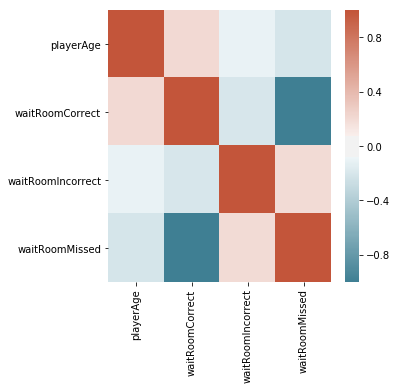

In [105]:
fig, ax = plt.subplots(figsize=(5,5))
pallete = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(wr_df.corr() , cmap = pallete)

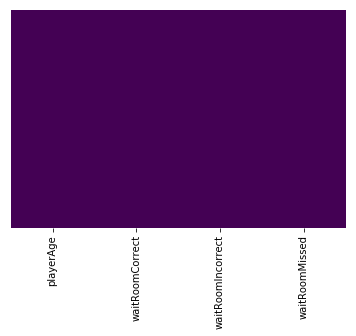

In [106]:
sns.heatmap(wr_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

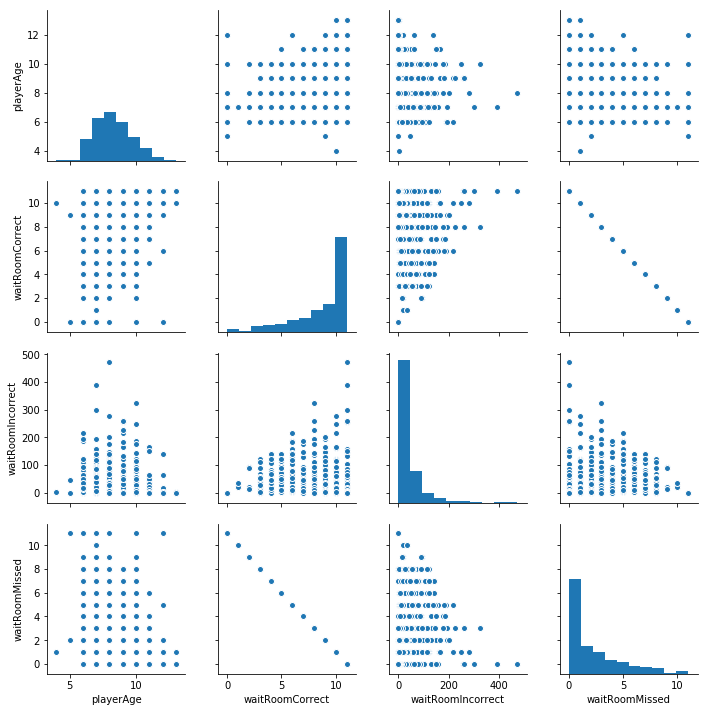

In [107]:
sns.pairplot(wr_df)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



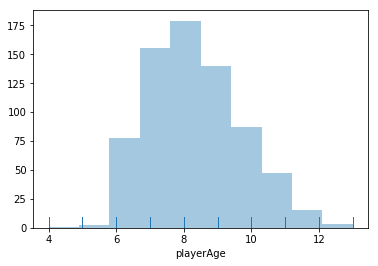

In [108]:
sns.distplot(wr_df["playerAge"], kde=False, rug=True, bins=10)

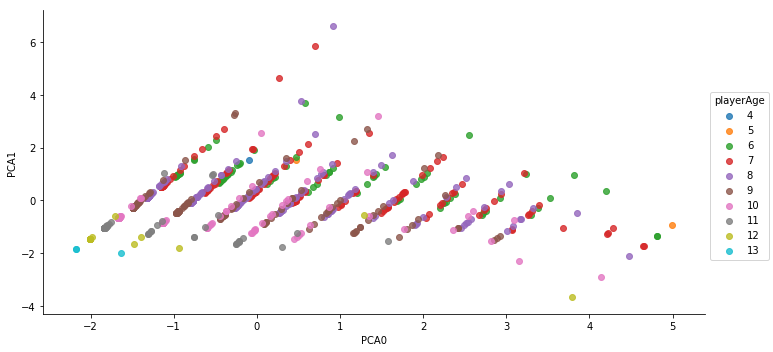

In [109]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wr_df)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
pca_df = pd.concat([pd.DataFrame(data = x_pca, columns = ['PCA0', 'PCA1']), wr_df['playerAge']], axis = 1)
sns.lmplot(x="PCA0", y="PCA1", data=pca_df, fit_reg=False, hue="playerAge", size=5, aspect=2)

# Finiding K ( KMeans)

## All player ages
### Dendogram

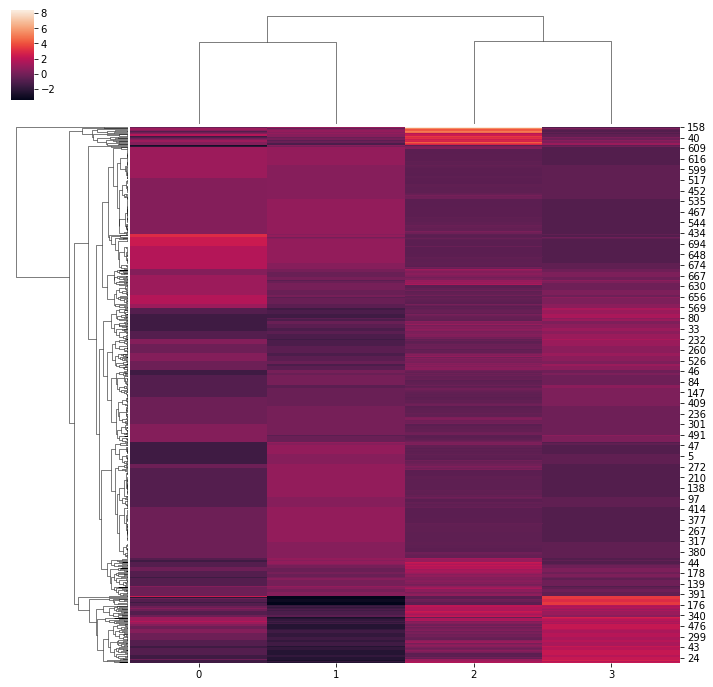

In [110]:
sns.clustermap(scaled_data, figsize=(12, 12))

### Elbow Analysis

In [112]:
from scipy.spatial import distance

cluster_range = range( 1, 21 )
cluster_intertias = []
cluster_scores = []
cluster_bic = []

def compute_bic(kmeans,X):
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = X.shape
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])
    const_term = 0.5 * m * np.log(N) * (d+1)
    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term
    return(BIC)

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_data )
    cluster_intertias.append( clusters.inertia_ )
    cluster_scores.append( clusters.score(scaled_data) )
    cluster_bic.append( compute_bic(clusters, scaled_data))

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, 
                             "cluster_intertias": cluster_intertias, 
                             "cluster_scores": cluster_scores,
                             "cluster_bic": cluster_bic} )
clusters_df.head(10)

,cluster_bic,cluster_intertias,cluster_scores,num_clusters
0,-4029.162164,2828.000000,-2828.000000,1
1,-3790.017156,1745.694079,-1745.694079,2
2,-3600.259298,1363.842960,-1363.842960,3
3,-3504.200037,1006.411991,-1006.411991,4
4,-3426.161400,843.059640,-843.059640,5
5,-3452.771782,758.200415,-758.200415,6
6,-3416.140137,676.082310,-676.082310,7
7,-3307.027983,603.734444,-603.734444,8
8,-3296.481128,557.845303,-557.845303,9
9,-3263.165479,506.032561,-506.032561,10


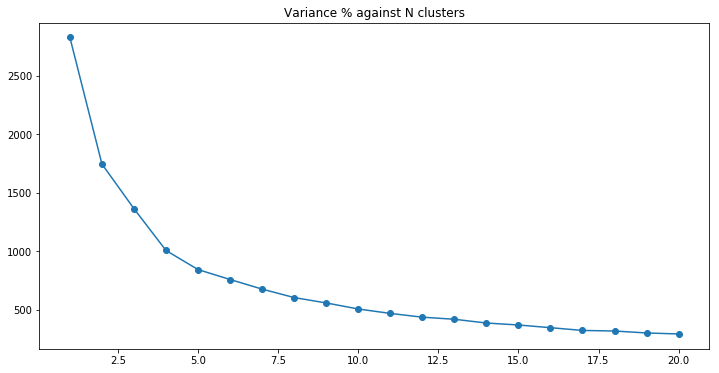

In [113]:
plt.figure(figsize=(12,6))
plt.title("Variance % against N clusters")
plt.plot( clusters_df.num_clusters, clusters_df.cluster_intertias, marker = "o" )

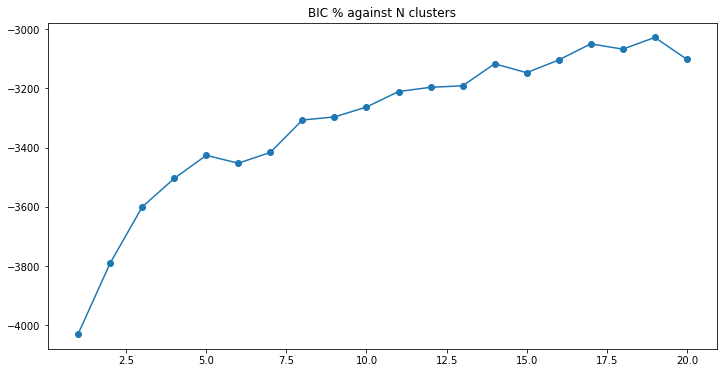

In [114]:
plt.figure(figsize=(12,6))
plt.title("BIC % against N clusters")
plt.plot( clusters_df.num_clusters, clusters_df.cluster_bic, marker = "o" )

For n_clusters = 2 The average silhouette_score is : 0.4224115823689063


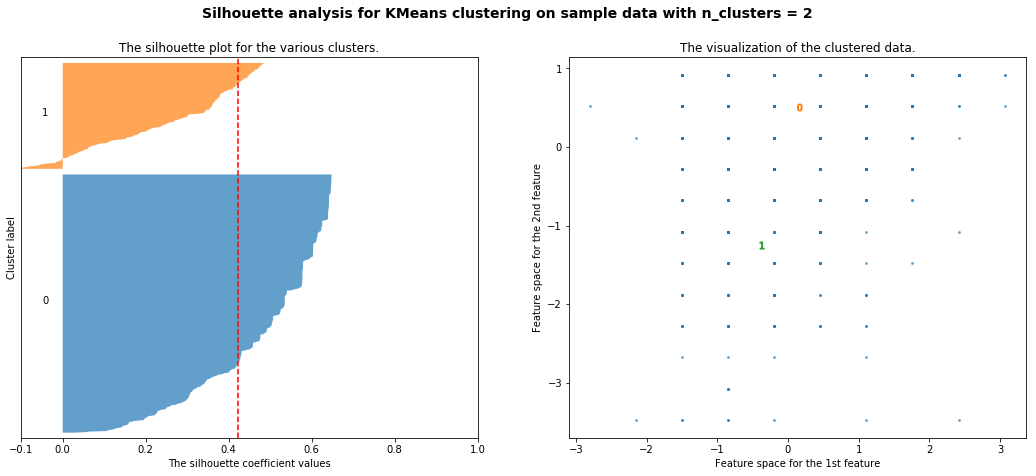

For n_clusters = 3 The average silhouette_score is : 0.4372216877348435


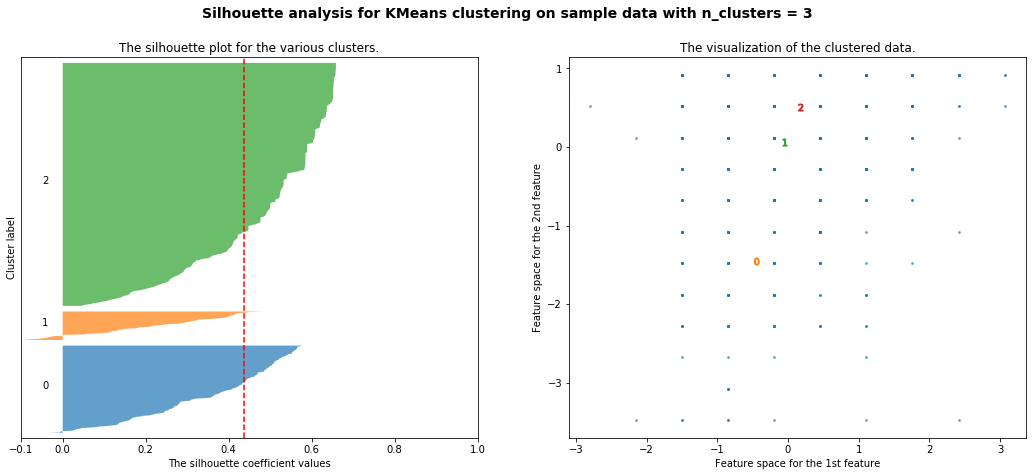

For n_clusters = 4 The average silhouette_score is : 0.35457092375536514


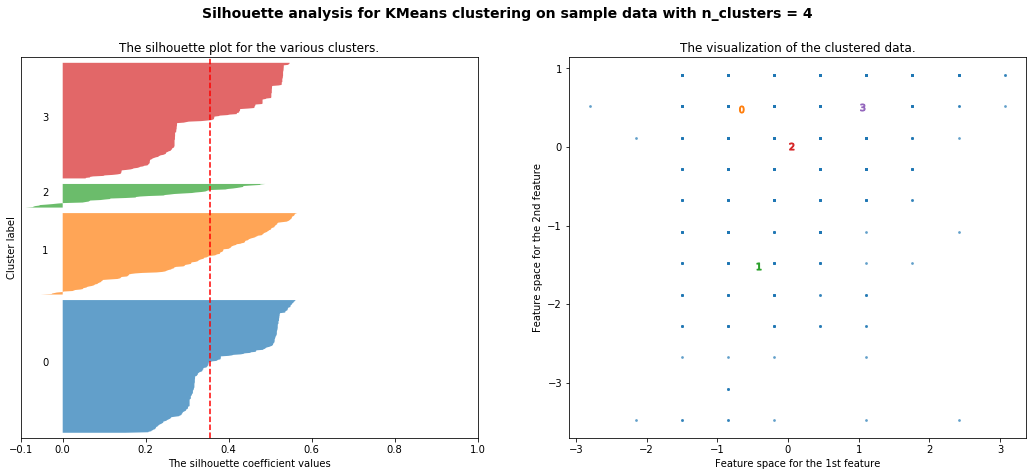

For n_clusters = 5 The average silhouette_score is : 0.33433304028971356


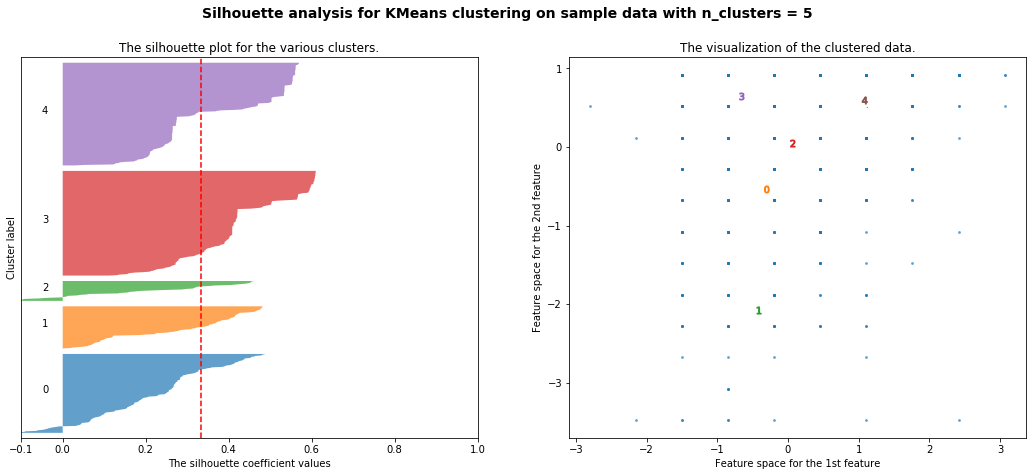

For n_clusters = 6 The average silhouette_score is : 0.3295818688070027


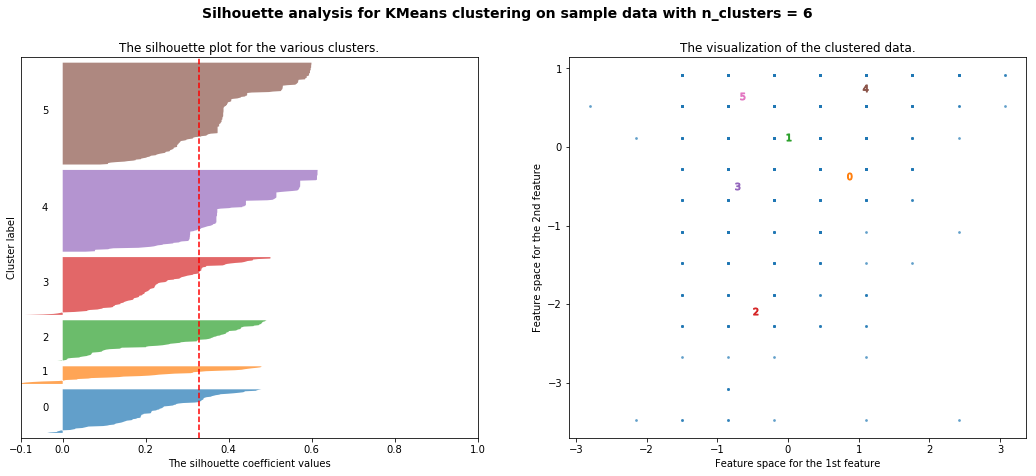

For n_clusters = 7 The average silhouette_score is : 0.2963113643534919


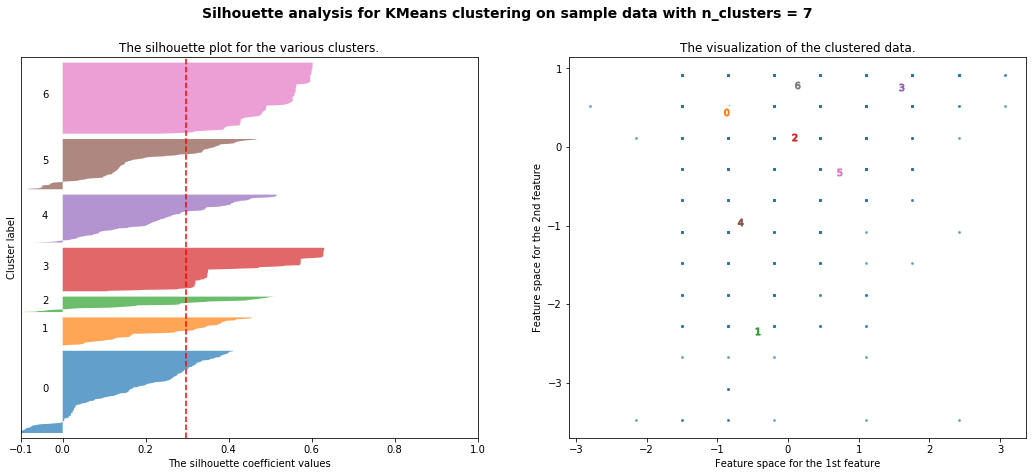

For n_clusters = 8 The average silhouette_score is : 0.3086101716150861


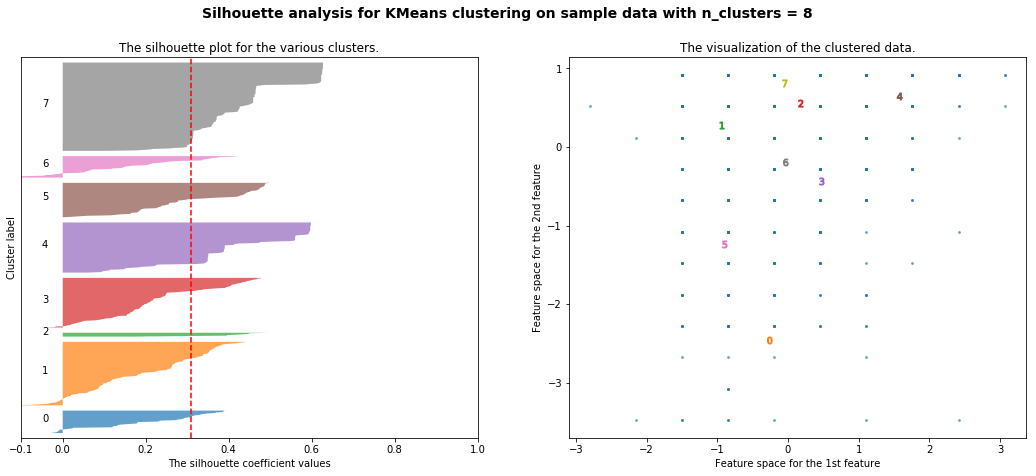

For n_clusters = 9 The average silhouette_score is : 0.32447294840253543


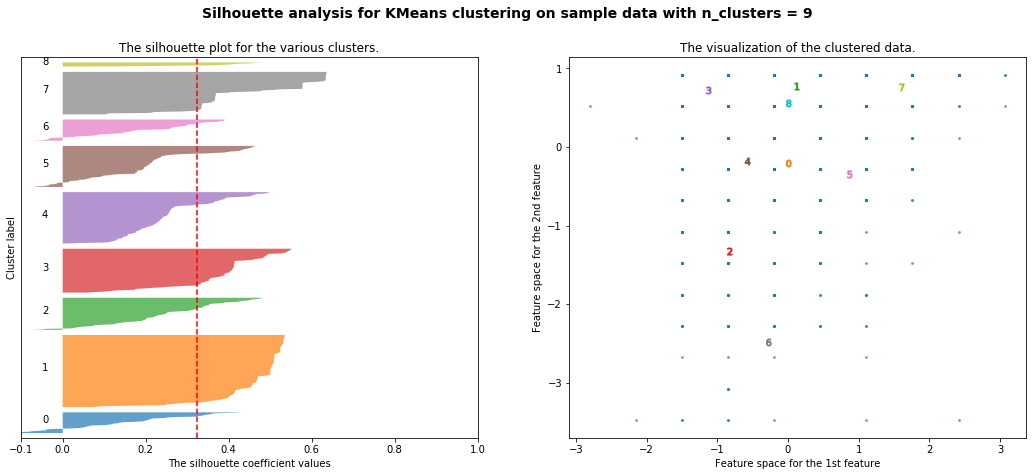

For n_clusters = 10 The average silhouette_score is : 0.33517364910628816


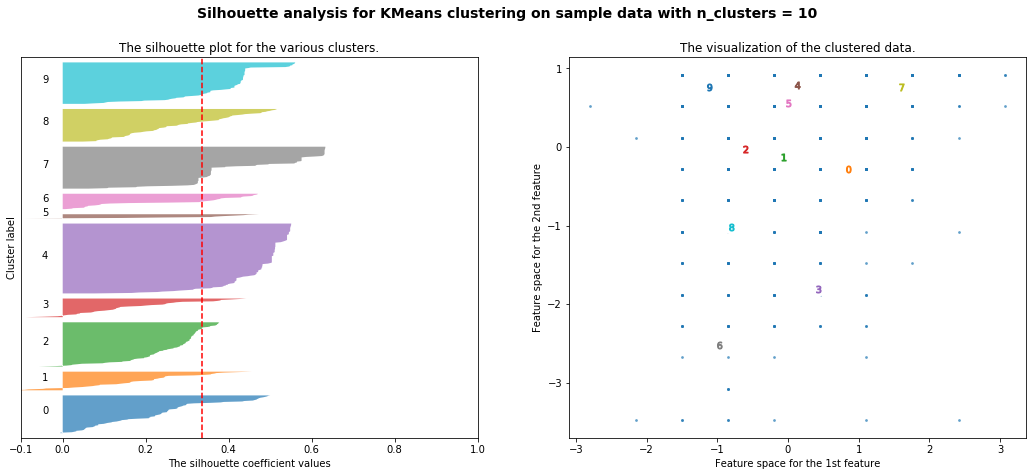

For n_clusters = 11 The average silhouette_score is : 0.35027792804750313


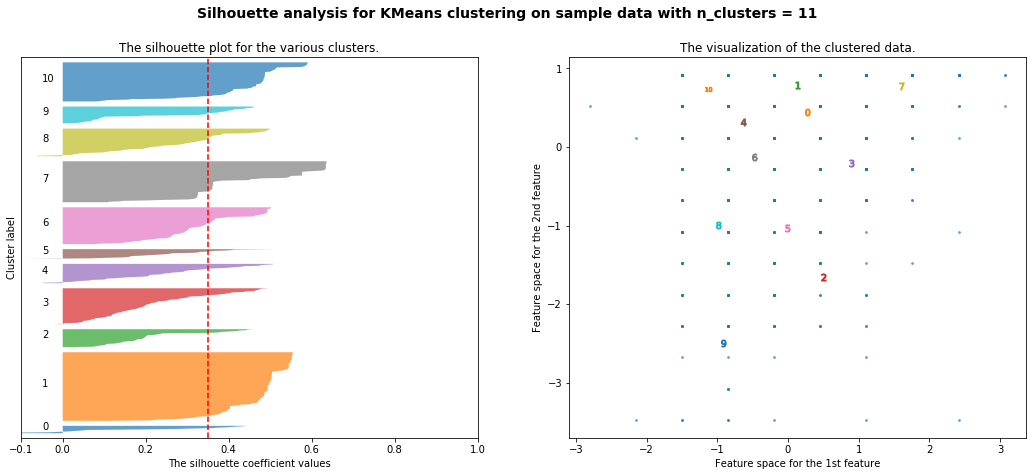

In [75]:
cluster_range = range( 2, 12 )

for n_clusters in cluster_range:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(scaled_data) + (n_clusters + 1) * 10])
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict( scaled_data )
  silhouette_avg = silhouette_score(scaled_data, cluster_labels)
  print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
  sample_silhouette_values = silhouette_samples(scaled_data, cluster_labels)
  y_lower = 10
  for i in range(n_clusters):
      ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i
      #color = plt.spectral(float(i) / n_clusters)
      #color = plt.spectral()
      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values, alpha=0.7)

      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  # The vertical line for average silhoutte score of all the values
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  #colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(scaled_data[:, 0], scaled_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

  for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

  plt.show()

In [90]:
def calculate_n_clusters(dataframe, tag_one, tag_two, show_distribution):
    n_components = np.arange(1, 18)
    models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(dataframe) 
              for n in n_components]
    
    scaler = StandardScaler()
    scaler.fit(dataframe)
    scaled_data = scaler.transform(dataframe)
    pca = PCA(n_components=2)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)

    plt.figure(figsize=(12,8))
    tempDF = pd.DataFrame(data = x_pca, columns = ['PCA0', 'PCA1'])
    finalDf = pd.concat([tempDF, dataframe['playerAge']], axis = 1)
    if(show_distribution):
        sns.lmplot(x="PCA0", y="PCA1", data=finalDf, fit_reg=False, hue="playerAge", size=5, aspect=2)

    g = plt.figure(figsize=(12,8))
    g.gca().grid(color='grey', linestyle='--', linewidth=1, alpha=0.3)
    plt.scatter(finalDf["PCA0"],finalDf["PCA1"], cmap='plasma')
    plt.xlabel('First principal component')
    plt.title(tag_one)
    plt.ylabel('Second Principal Component')


    
    d = plt.figure(figsize=(12,8))
    d.gca().grid(color='grey', linestyle='--', linewidth=1, alpha=0.3)
    plt.plot(n_components, [m.bic(dataframe) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(dataframe) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.title(tag_two)
    plt.xlabel('n_components');

<Figure size 864x576 with 0 Axes>

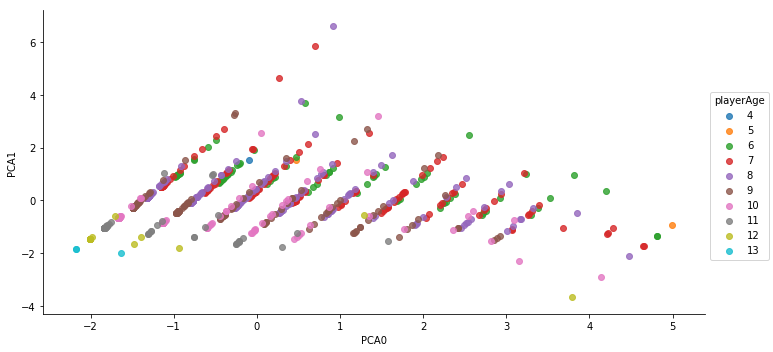

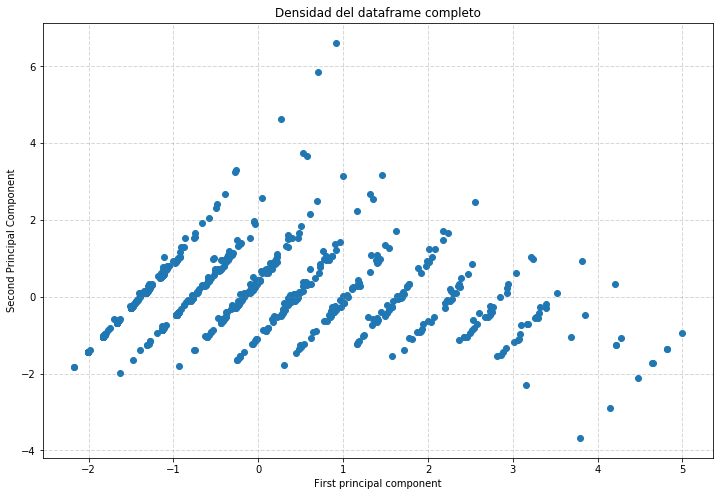

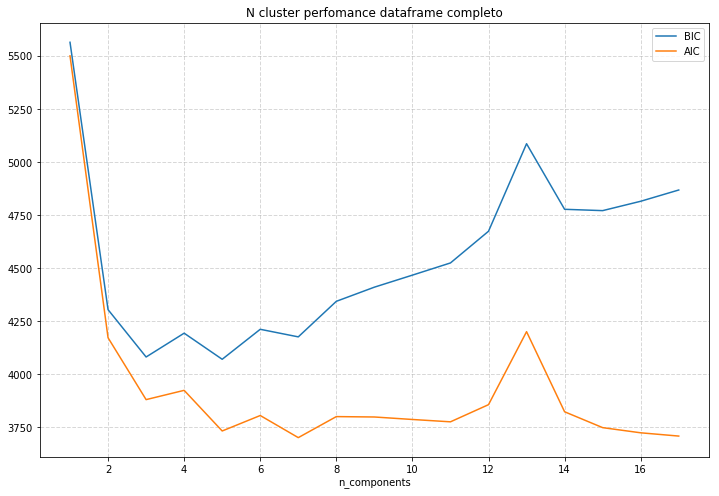

In [91]:
calculate_n_clusters(wr_df,"Densidad del dataframe completo", "N cluster perfomance dataframe completo", True)